In [54]:
library(ggplot2)
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(tseries)

In [55]:
data <- read.csv("data/sum-months-carrier.csv")

In [56]:
data["delay_rate"] <- data$carrier_ct / data$arr_flights
data["new_delay_rate"] <- (data$arr_del15 - data$late_aircraft_ct)/(data$arr_flights - data$late_aircraft_ct)
data["new_arr_flights"] <- (data$arr_flights - data$late_aircraft_ct)
data["arr_flights_n"] = data$arr_flights / max(data$arr_flights)

In [57]:
data["jan"] <- as.numeric(data$month==1)
data["feb"] <- as.numeric(data$month==2)
data["mar"] <- as.numeric(data$month==3)
data["apr"] <- as.numeric(data$month==4)
data["may"] <- as.numeric(data$month==5)
data["jun"] <- as.numeric(data$month==6)
data["jul"] <- as.numeric(data$month==7)
data["aug"] <- as.numeric(data$month==8)
data["sep"] <- as.numeric(data$month==9)
data["oct"] <- as.numeric(data$month==10)
data["nov"] <- as.numeric(data$month==11)
data["dec"] <- as.numeric(data$month==12)

In [58]:
finiteFilter = data$delay_rate > 0 & data$delay_rate < 1

In [59]:
data["t_delay_rate"] <- log(data$delay_rate / (1-data$delay_rate))

In [60]:
data

t,carrier,carrier_name,month,year,covid,control,extra_mon,extra_tue,extra_wed,⋯,apr,may,jun,jul,aug,sep,oct,nov,dec,t_delay_rate
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AA,American Airlines Inc.,6,2003,0,0,1,0,0,⋯,0,0,1,0,0,0,0,0,0,-2.933078
1,AA,American Airlines Inc.,6,2003,0,0,1,0,0,⋯,0,0,1,0,0,0,0,0,0,-3.114394
1,AS,Alaska Airlines Inc.,6,2003,0,0,1,0,0,⋯,0,0,1,0,0,0,0,0,0,-2.637390
1,AS,Alaska Airlines Inc.,6,2003,0,0,1,0,0,⋯,0,0,1,0,0,0,0,0,0,-2.940695
1,B6,JetBlue Airways,6,2003,0,0,1,0,0,⋯,0,0,1,0,0,0,0,0,0,-2.414929
1,B6,JetBlue Airways,6,2003,0,0,1,0,0,⋯,0,0,1,0,0,0,0,0,0,-2.523770
1,CO,Continental Air Lines Inc.,6,2003,0,0,1,0,0,⋯,0,0,1,0,0,0,0,0,0,-3.183508
1,CO,Continental Air Lines Inc.,6,2003,0,0,1,0,0,⋯,0,0,1,0,0,0,0,0,0,-3.627799
1,DH,Atlantic Coast Airlines,6,2003,0,0,1,0,0,⋯,0,0,1,0,0,0,0,0,0,-2.451500



Call: rlm(formula = t_delay_rate ~ sqrt(arr_flights_n) + as.factor(carrier), 
    data = data[finiteFilter, ])
Residuals:
      Min        1Q    Median        3Q       Max 
-3.723259 -0.297202 -0.003429  0.303201  1.727415 

Coefficients:
                     Value    Std. Error t value 
(Intercept)           -3.0098   0.0356   -84.4742
sqrt(arr_flights_n)   -0.4553   0.0448   -10.1688
as.factor(carrier)AA   0.5914   0.0391    15.1295
as.factor(carrier)AQ  -0.3545   0.0756    -4.6876
as.factor(carrier)AS   0.0214   0.0381     0.5612
as.factor(carrier)B6   0.4958   0.0380    13.0549
as.factor(carrier)CO   0.1986   0.0448     4.4374
as.factor(carrier)DH  -0.0443   0.0665    -0.6659
as.factor(carrier)DL   0.3197   0.0394     8.1220
as.factor(carrier)EV   0.5186   0.0386    13.4447
as.factor(carrier)F9   0.2688   0.0393     6.8430
as.factor(carrier)FL  -0.0513   0.0417    -1.2298
as.factor(carrier)G4   0.2705   0.0558     4.8474
as.factor(carrier)HA   0.0863   0.0390     2.2110
as.factor(

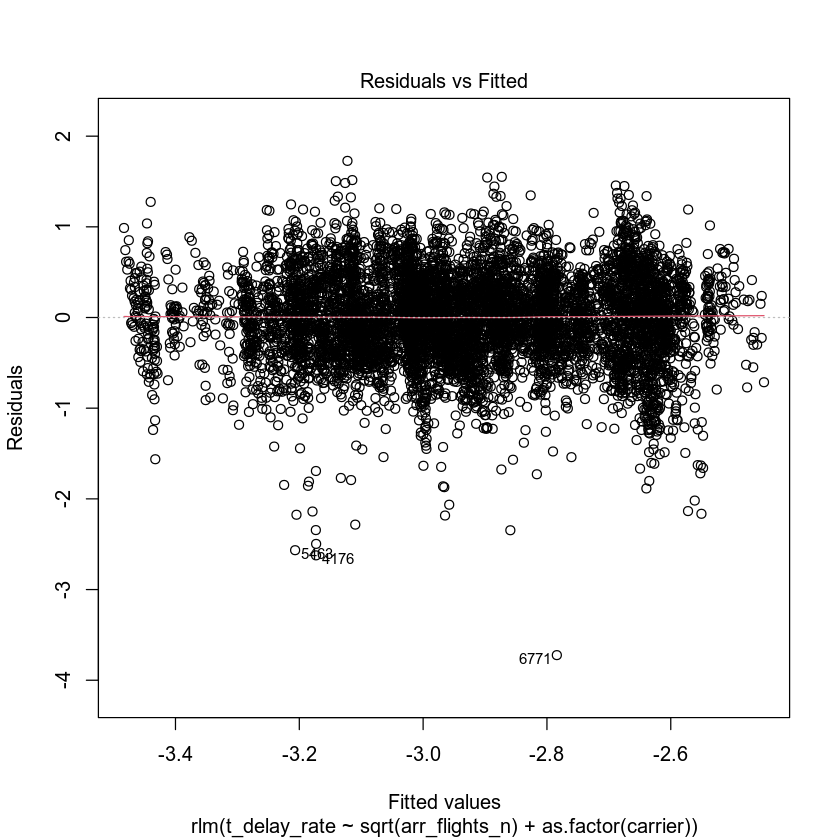

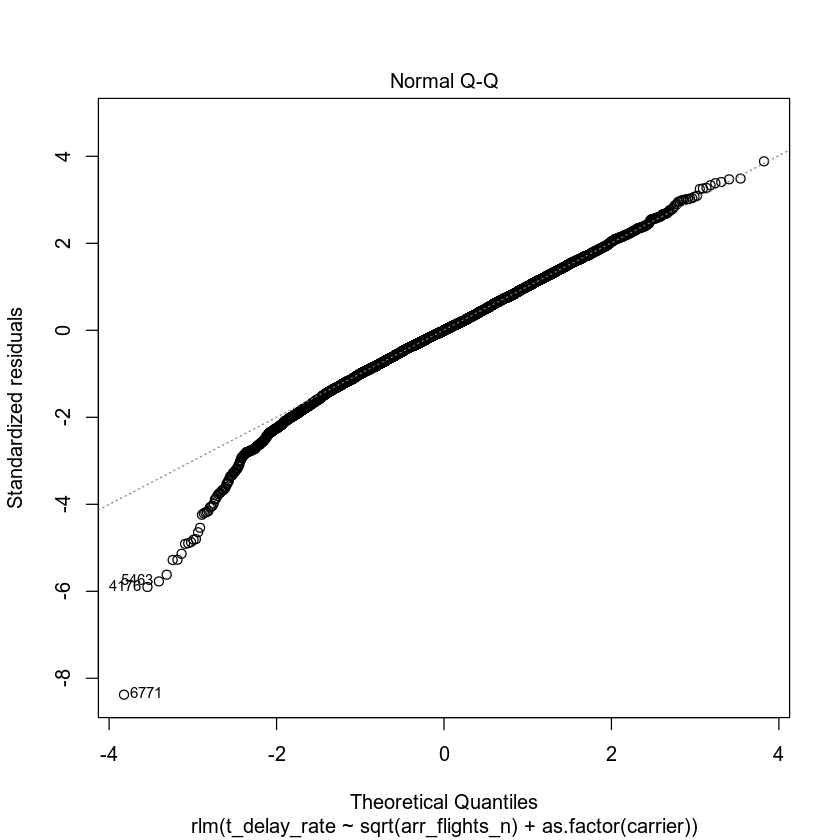

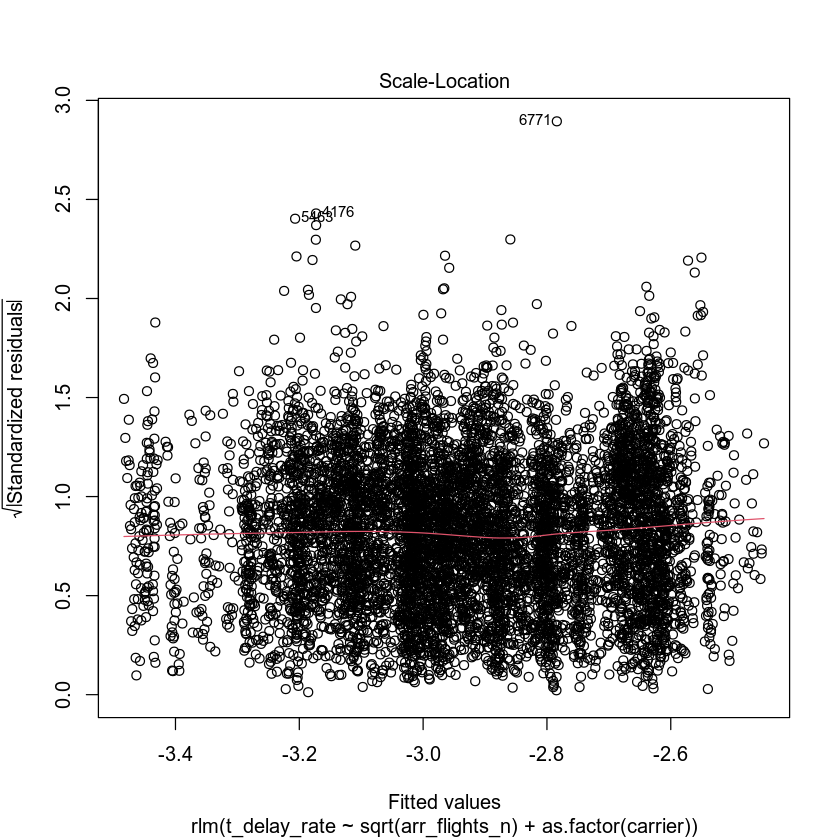

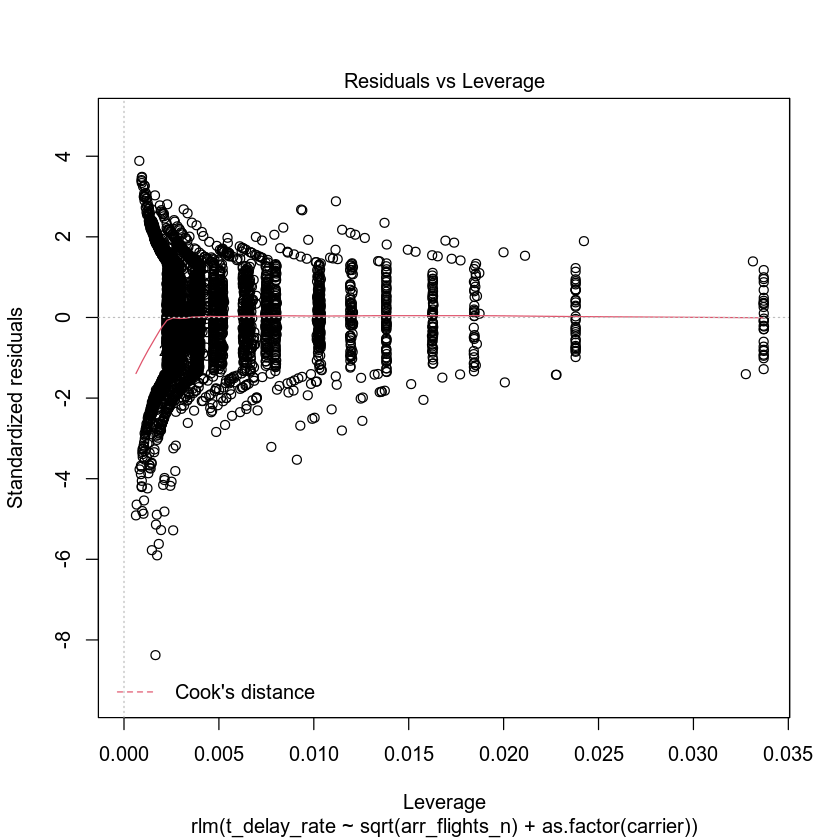

In [70]:
m<-MASS::rlm(t_delay_rate~sqrt(arr_flights_n)+as.factor(carrier),data=data[finiteFilter,])

summary(m)
plot(m)

In [50]:
jarque.bera.test(m$residuals)


	Jarque Bera Test

data:  m$residuals
X-squared = 25936, df = 2, p-value < 2.2e-16


In [52]:
m<-MASS::rlm(t_delay_rate~sqrt(arr_flights_n)+as.factor(airport)+as.factor(carrier),data=data[finiteFilter,])

summary(m)
m_ac <- m


Call: rlm(formula = t_delay_rate ~ sqrt(arr_flights_n) + as.factor(airport) + 
    as.factor(carrier), data = data[finiteFilter, ])
Residuals:
    Min      1Q  Median      3Q     Max 
-4.4433 -0.4050  0.0164  0.4053  4.3963 

Coefficients:
                      Value    Std. Error t value 
(Intercept)            -1.8134   0.0205   -88.3203
sqrt(arr_flights_n)    -0.6059   0.0165   -36.6191
as.factor(airport)ABI  -0.0342   0.0444    -0.7700
as.factor(airport)ABQ   0.0433   0.0241     1.7992
as.factor(airport)ABR  -0.7317   0.0615   -11.8912
as.factor(airport)ABY  -0.0957   0.0468    -2.0427
as.factor(airport)ACK   0.0839   0.0568     1.4774
as.factor(airport)ACT  -0.2606   0.0457    -5.6967
as.factor(airport)ACV   0.3317   0.0470     7.0574
as.factor(airport)ACY   0.0296   0.0496     0.5981
as.factor(airport)ADK   0.6028   0.0527    11.4449
as.factor(airport)ADQ  -0.1231   0.0475    -2.5921
as.factor(airport)AEX  -0.0925   0.0337    -2.7448
as.factor(airport)AGS  -0.0075   0.0345    -0

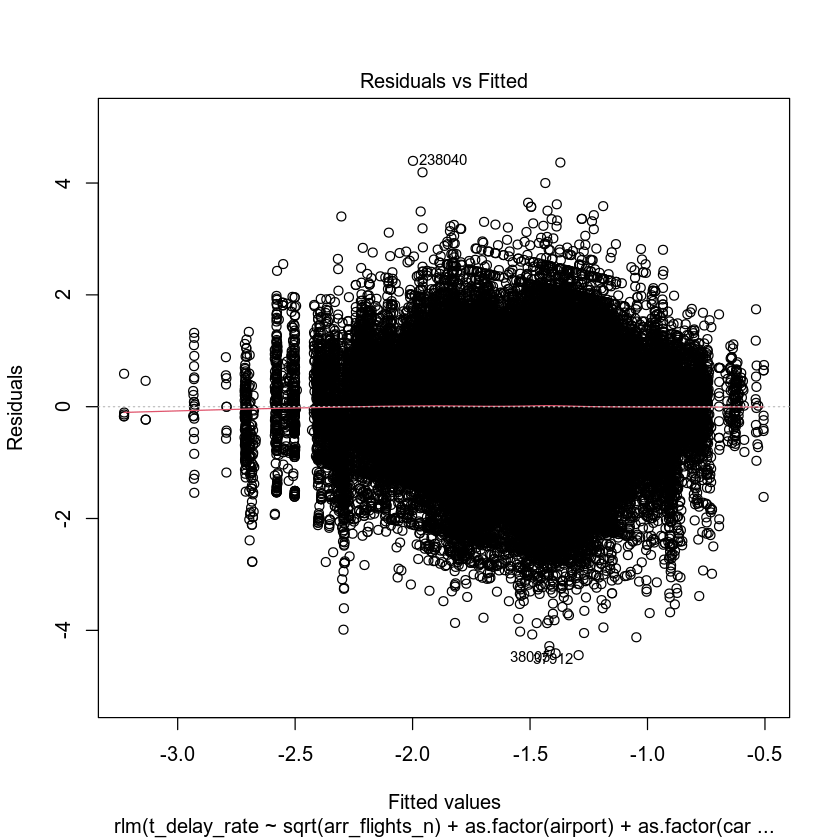

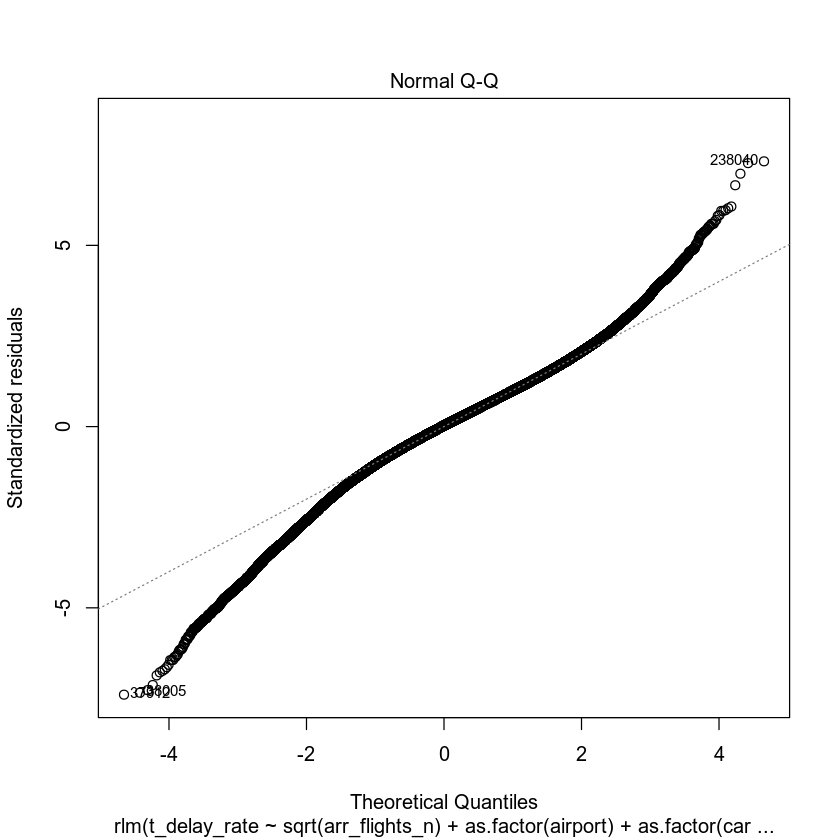

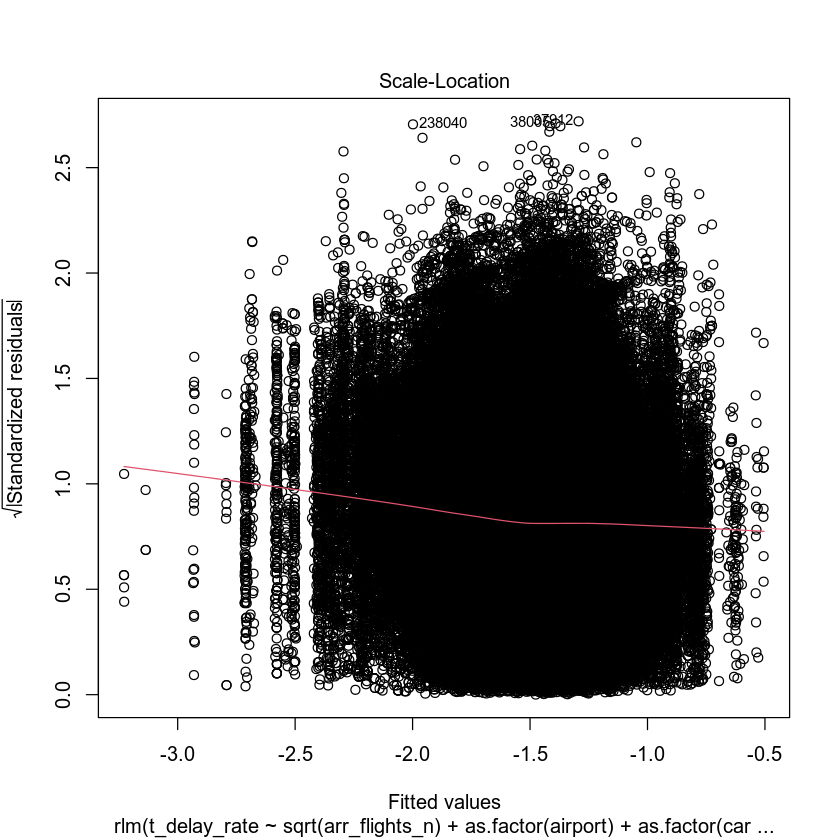

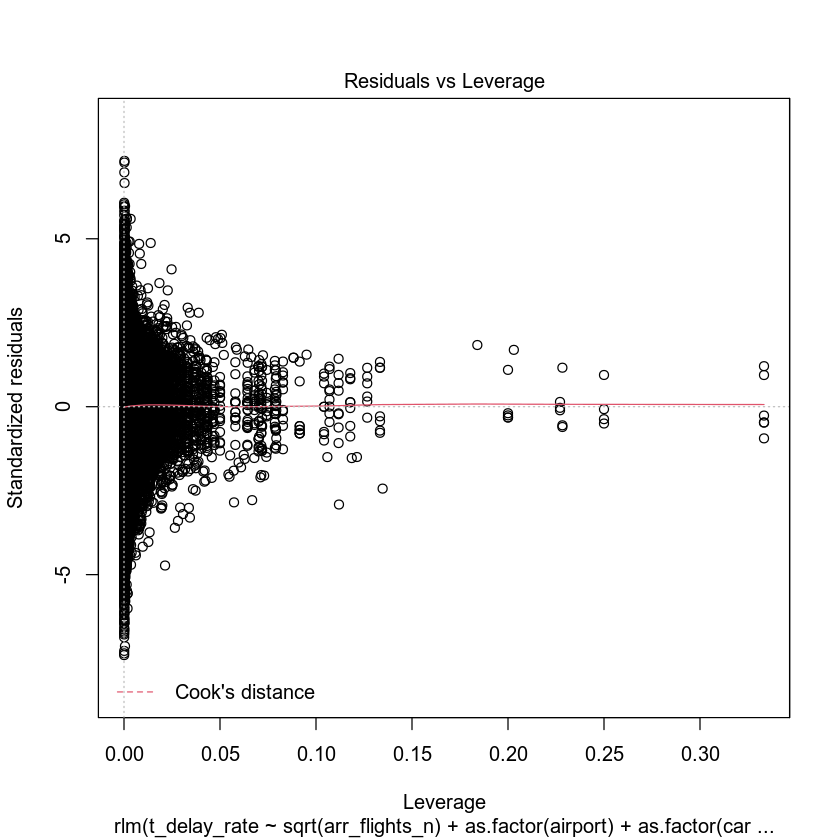

In [53]:
plot(m_ac)

In [ ]:
m<-MASS::rlm(t_delay_rate~sqrt(arr_flights_n)+as.factor(airport)+as.factor(carrier),data=data[finiteFilter,])

summary(m)
m_ac <- m